In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import re  
!wget https://awards.opdc.go.th/awards_opdc/assets/fonts/THSarabunNew/THSarabunNew.ttf
import seaborn as sb
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'tahoma'
# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use('default') 
print( f"Python {sys.version}" )
print( f"Pandas {pd.__version__}" )
print( f"NumPy {np.__version__}" )
print( f"Matplotlib {mpl.__version__}" )

'wget' is not recognized as an internal or external command,
operable program or batch file.


Python 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
Pandas 1.4.2
NumPy 1.21.5
Matplotlib 3.5.1


# 1.) Load and check data 

In [2]:
# Load dataset crimedata1 ข้อมูลคดีอาชญากรรมในช่วงปี 2550-2559
crime_data1 = pd.read_csv('https://raw.githubusercontent.com/saponsarub/dataset/main/crime_data1x.txt')   
crime_data1.info()
#crime_data1.head(20)
#crime_data1.tail(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ภาค                 1092 non-null   object
 1   จังหวัด             1092 non-null   object
 2   ประเภทคดีอาชญากรรม  1089 non-null   object
 3   ประเภทความผิด       1092 non-null   object
 4   2550                1078 non-null   object
 5   2551                1078 non-null   object
 6   2552                1078 non-null   object
 7   2553                1078 non-null   object
 8   2554                1092 non-null   object
 9   2555                1092 non-null   object
 10  2556                1092 non-null   object
 11  2557                1092 non-null   object
 12  2558                1092 non-null   object
 13  2559                1092 non-null   object
dtypes: object(14)
memory usage: 119.8+ KB


In [3]:
# Load dataset crimedata2 ข้อมูลคดีอาชญากรรมในช่วงปี 2560-2564
crime_data2 = pd.read_csv('https://raw.githubusercontent.com/saponsarub/dataset/main/crime_data2.txt') 
crime_data2.info()
#crime_data2.head(20)
#crime_data2.tail(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ภาค            547 non-null    object
 1   จังหวัด        547 non-null    object
 2   ประเภทความผิด  546 non-null    object
 3   2560           547 non-null    object
 4   2560.1         547 non-null    object
 5   2560.2         547 non-null    object
 6   2561           547 non-null    object
 7   2561.1         547 non-null    object
 8   2561.2         547 non-null    object
 9   2562           547 non-null    object
 10  2562.1         547 non-null    object
 11  2562.2         547 non-null    object
 12  2563           547 non-null    object
 13  2563.1         547 non-null    object
 14  2563.2         547 non-null    object
 15  2564           547 non-null    object
 16  2564.1         547 non-null    object
 17  2564.2         547 non-null    object
dtypes: object(18)
memory usage: 77

In [4]:
# Load dataset drug_data ข้อมูลคดียาเสพติดในช่วงปี 2554-2564
drug_data = pd.read_csv('https://raw.githubusercontent.com/saponsarub/dataset/main/drug_data.txt') 
drug_data.info()
#drug_data.head(20)
#drug_data.tail(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   จังหวัด       77 non-null     object 
 1   ชนิดยาเสพติด  770 non-null    object 
 2   2554          770 non-null    object 
 3   2555          770 non-null    object 
 4   2556          770 non-null    object 
 5   2557          770 non-null    object 
 6   2558          770 non-null    object 
 7   2559          770 non-null    object 
 8   2560          770 non-null    object 
 9   2561          770 non-null    object 
 10  2562          769 non-null    object 
 11  2563          769 non-null    object 
 12  2564          770 non-null    object 
 13  Unnamed: 13   0 non-null      float64
dtypes: float64(1), object(13)
memory usage: 84.3+ KB


In [5]:
# Load dataset pop_data ข้อมูลประชากรรายจังหวัด ปี2564
pop_data = pd.read_csv('https://raw.githubusercontent.com/saponsarub/dataset/main/pop_data.txt') 
pop_data.info()
#pop_data.head(20)
#pop_data.tail(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3417 entries, 0 to 3416
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ภาค                   3417 non-null   object
 1   จังหวัด               3417 non-null   object
 2   เขตการปกครอง          3417 non-null   object
 3   กลุ่มอายุ (ย้ายถิ่น)  3416 non-null   object
 4   ยอดรวม                3417 non-null   object
 5   ยอดรวม.1              3417 non-null   object
 6   ยอดรวม.2              3417 non-null   object
 7   ผู้ย้ายถิ่น           3333 non-null   object
 8   ผู้ย้ายถิ่น.1         3249 non-null   object
 9   ผู้ย้ายถิ่น.2         3165 non-null   object
 10  ผู้ไม่ย้ายถิ่น        3417 non-null   object
 11  ผู้ไม่ย้ายถิ่น.1      3417 non-null   object
 12  ผู้ไม่ย้ายถิ่น.2      3417 non-null   object
dtypes: object(13)
memory usage: 347.2+ KB


In [6]:
# Load dataset rob1_data ข้อมูลคดีลักทรัพย์ ปี 2550-2559
rob1_data = pd.read_csv('https://raw.githubusercontent.com/saponsarub/dataset/main/robberry1_data.txt') 
rob1_data.info()
#rob1_data.head(20)
#rob1_data.tail(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716 entries, 0 to 1715
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ภาค                 1716 non-null   object 
 1   จังหวัด             1716 non-null   object 
 2   ประเภทคดีอาชญากรรม  1716 non-null   object 
 3   ประเภทความผิด       1716 non-null   object 
 4   2550                1694 non-null   object 
 5   2551                1694 non-null   object 
 6   2552                1694 non-null   object 
 7   2553                1694 non-null   object 
 8   2554                1716 non-null   object 
 9   2555                1716 non-null   object 
 10  2556                1716 non-null   object 
 11  2557                1716 non-null   object 
 12  2558                1716 non-null   object 
 13  2559                1716 non-null   object 
 14  Unnamed: 14         0 non-null      float64
 15  Unnamed: 15         0 non-null      float64
dtypes: flo

In [7]:
# Load dataset rob1_data ข้อมูลคดีลักทรัพย์ ปี 2559-2564
rob2_data = pd.read_csv('https://raw.githubusercontent.com/saponsarub/dataset/main/robberry2_data.txt') 
rob2_data.info()
#rob2_data.head(20)
#rob2_data.tail(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ภาค            1171 non-null   object 
 1   จังหวัด        1171 non-null   object 
 2   ประเภทความผิด  1170 non-null   object 
 3   2560           1171 non-null   object 
 4   Unnamed: 4     1171 non-null   object 
 5   Unnamed: 5     1171 non-null   object 
 6   2561           1171 non-null   object 
 7   Unnamed: 7     1171 non-null   object 
 8   Unnamed: 8     1171 non-null   object 
 9   2562           1171 non-null   object 
 10  Unnamed: 10    1171 non-null   object 
 11  Unnamed: 11    1171 non-null   object 
 12  2563           1171 non-null   object 
 13  Unnamed: 13    1171 non-null   object 
 14  Unnamed: 14    1171 non-null   object 
 15  2564           1171 non-null   object 
 16  Unnamed: 16    1171 non-null   object 
 17  Unnamed: 17    1171 non-null   object 
 18  Unnamed:

In [51]:
# Load dataset gpp_data ข้อมูลGPP2563
gpp_data = pd.read_csv('https://raw.githubusercontent.com/saponsarub/dataset/main/gpp_data.txt') 
gpp_data.info()
#gpp_data.head(20)
#gpp_data.tail(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   จังหวัด                       78 non-null     object 
 1   ผลิตภัณฑ์จังหวัดต่อหัว (บาท)  78 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.3+ KB


In [58]:
# Load dataset work_data ข้อมูลการทำงานของคนไทยปี 2564
work_data = pd.read_csv('https://raw.githubusercontent.com/saponsarub/dataset/main/work_data.txt') 
work_data.info()
#work_data.head(20)
#work_data.tail(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ภาค                  858 non-null    object 
 1   จังหวัด              858 non-null    object 
 2   สถานภาพแรงงาน        858 non-null    object 
 3   กำลังแรงงาน          858 non-null    object 
 4   กำลังแรงงานปัจจุบัน  858 non-null    object 
 5   รวม                  858 non-null    float64
 6   ชาย                  858 non-null    float64
 7   หญิง                 858 non-null    float64
dtypes: float64(3), object(5)
memory usage: 53.8+ KB


In [61]:
# Load dataset study_data ข้อมูลการศึกษา  2564
study_data = pd.read_csv('https://raw.githubusercontent.com/saponsarub/dataset/main/study_data.txt') 
study_data.info()
#study_data.head(20)
#study_data.tail(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ภาค            1014 non-null   object 
 1   จังหวัด        1014 non-null   object 
 2   ระดับการศึกษา  1014 non-null   object 
 3   สายการศึกษา    1014 non-null   object 
 4   รวม            1014 non-null   float64
dtypes: float64(1), object(4)
memory usage: 39.7+ KB


# 2.) Prepare Data

In [175]:
#set data
df1 = crime_data1.drop(index=[1092,1093])
for i in range(2550,2560):
    df1[str(i)] = df1[str(i)].str.replace(',', '').astype(float)#เปลี่ยนเปลี่ย่นtype:flot,ตัดcommaของตัวเลขหลักพัน
df2 = crime_data2.drop(index=0)
for i in range(2560,2565):
    df2[str(i)] = df2[str(i)].str.replace(',', '').astype(float)
df3 = drug_data.drop(drug_data.columns[[13]], axis=1)
for i in range(2554,2565):
    df3[str(i)] = df3[str(i)].str.replace(',', '').astype(float)
df4 = rob1_data.drop(rob1_data.columns[[14,15]], axis=1)
for i in range(2550,2560):
    df4[str(i)] = df4[str(i)].str.replace(',', '').astype(float)
df5 = rob2_data.drop(rob2_data.columns[[18]], axis=1)
df5 = df5.iloc[1:,:] 
for i in range(2560,2565):
    df5[str(i)] = df5[str(i)].str.replace(',', '').astype(float)
df6 = pop_data.iloc[1:,:]
df6['ยอดรวม'] = df6['ยอดรวม'].str.replace(',', '').astype(float)
df7 = gpp_data.iloc[1:,:]
df8 = work_data.iloc[11:,:]
df_gpp = df7
df9 = study_data.iloc[13:,:]

C:\Users\sapon sarub\AppData\Local\Temp\ipykernel_19460\771675098.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['ยอดรวม'] = df6['ยอดรวม'].str.replace(',', '').astype(float)


### Crime_data1 

In [9]:
#ข้อมูลอาชญากรรมรวมของdata_crime1 รายจังหวัด และเช็คค่าNAN
df_crime1= df1[::14][['จังหวัด','2550','2551','2552','2553','2554','2555','2556','2557','2558','2559']].reset_index(drop=True)
df_crime1.info()
df_crime1.loc[ df_crime1['2550'].isna() , : ]
#df_crime1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   จังหวัด  78 non-null     object 
 1   2550     77 non-null     float64
 2   2551     77 non-null     float64
 3   2552     77 non-null     float64
 4   2553     77 non-null     float64
 5   2554     78 non-null     float64
 6   2555     78 non-null     float64
 7   2556     78 non-null     float64
 8   2557     78 non-null     float64
 9   2558     78 non-null     float64
 10  2559     78 non-null     float64
dtypes: float64(10), object(1)
memory usage: 6.8+ KB


,จังหวัด,2550,2551,2552,2553,2554,2555,2556,2557,2558,2559
52,บึงกาฬ,NaN,NaN,NaN,NaN,97.0,73.0,114.0,76.0,87.0,56.0


In [10]:
#นำค่าของจังหวัดหนองคายไปแทนที่ในจังหวัดบึงกาฬ เนื่องจากเป็นจังหวัดที่แยกออกาจากหนองคายจึงไม่มีข้อมูลตั้งแต่ปี2553ลงไป
df_nongkai = df_crime1[df_crime1['จังหวัด'] == 'หนองคาย']
df_crime1.at[52,'2550'] = df_nongkai['2550']
df_crime1.at[52,'2551'] = df_nongkai['2551']
df_crime1.at[52,'2552'] = df_nongkai['2552']
df_crime1.at[52,'2553'] = df_nongkai['2553']
df_crime1[df_crime1['จังหวัด'] == 'บึงกาฬ']
df_crime1

,จังหวัด,2550,2551,2552,2553,2554,2555,2556,2557,2558,2559
0,ทั่วราชอาณาจักร,39461.0,33483.0,32671.0,29253.0,23993.0,25040.0,23944.0,23613.0,25087.0,20305.0
1,กรุงเทพมหานคร,6027.0,5372.0,5204.0,4578.0,3163.0,3795.0,3508.0,3517.0,4326.0,3068.0
2,สมุทรปราการ,668.0,509.0,498.0,496.0,431.0,507.0,521.0,398.0,475.0,359.0
3,นนทบุรี,597.0,514.0,473.0,421.0,242.0,354.0,329.0,274.0,362.0,296.0
4,ปทุมธานี,840.0,710.0,638.0,585.0,479.0,639.0,508.0,481.0,473.0,395.0
...,...,...,...,...,...,...,...,...,...,...,...
73,ตรัง,450.0,398.0,356.0,342.0,299.0,311.0,284.0,340.0,352.0,255.0
74,พัทลุง,358.0,318.0,307.0,239.0,239.0,233.0,264.0,254.0,305.0,212.0
75,ปัตตานี,515.0,404.0,515.0,465.0,397.0,378.0,392.0,362.0,283.0,271.0
76,ยะลา,474.0,232.0,216.0,368.0,317.0,241.0,301.0,332.0,283.0,244.0


### Crime_data2

In [11]:
#ข้อมูลอาชญากรรม(รวม)ของdata_crime2 รายจังหวัดและเช็คค่าNAN
df_crime2= df2[::7][['จังหวัด','2560','2561','2562','2563','2564']].reset_index(drop=True)
#df_crime2.info()
df_crime2

,จังหวัด,2560,2561,2562,2563,2564
0,ทั่วราชอาณาจักร,19830.0,17468.0,16573.0,14459.0,13738.0
1,กรุงเทพมหานคร,2727.0,2457.0,2395.0,2119.0,1993.0
2,สมุทรปราการ,361.0,291.0,283.0,266.0,282.0
3,นนทบุรี,288.0,263.0,238.0,292.0,273.0
4,ปทุมธานี,414.0,302.0,335.0,279.0,312.0
...,...,...,...,...,...,...
73,ตรัง,283.0,274.0,265.0,236.0,219.0
74,พัทลุง,219.0,173.0,194.0,144.0,155.0
75,ปัตตานี,201.0,176.0,145.0,124.0,120.0
76,ยะลา,213.0,165.0,148.0,124.0,129.0


### Merge crime_data1 and crime_data2

In [12]:
#ข้อมูลอาชญากรรม(รวม)รายจังหวัด ในช่วงปี 2550-2564 (df1 merged f2)
df_crime= df_crime1.merge(df_crime2)
df_crime

,จังหวัด,2550,2551,2552,2553,2554,2555,2556,2557,2558,2559,2560,2561,2562,2563,2564
0,ทั่วราชอาณาจักร,39461.0,33483.0,32671.0,29253.0,23993.0,25040.0,23944.0,23613.0,25087.0,20305.0,19830.0,17468.0,16573.0,14459.0,13738.0
1,กรุงเทพมหานคร,6027.0,5372.0,5204.0,4578.0,3163.0,3795.0,3508.0,3517.0,4326.0,3068.0,2727.0,2457.0,2395.0,2119.0,1993.0
2,สมุทรปราการ,668.0,509.0,498.0,496.0,431.0,507.0,521.0,398.0,475.0,359.0,361.0,291.0,283.0,266.0,282.0
3,นนทบุรี,597.0,514.0,473.0,421.0,242.0,354.0,329.0,274.0,362.0,296.0,288.0,263.0,238.0,292.0,273.0
4,ปทุมธานี,840.0,710.0,638.0,585.0,479.0,639.0,508.0,481.0,473.0,395.0,414.0,302.0,335.0,279.0,312.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,ตรัง,450.0,398.0,356.0,342.0,299.0,311.0,284.0,340.0,352.0,255.0,283.0,274.0,265.0,236.0,219.0
74,พัทลุง,358.0,318.0,307.0,239.0,239.0,233.0,264.0,254.0,305.0,212.0,219.0,173.0,194.0,144.0,155.0
75,ปัตตานี,515.0,404.0,515.0,465.0,397.0,378.0,392.0,362.0,283.0,271.0,201.0,176.0,145.0,124.0,120.0
76,ยะลา,474.0,232.0,216.0,368.0,317.0,241.0,301.0,332.0,283.0,244.0,213.0,165.0,148.0,124.0,129.0


### Drug_data

In [13]:
#ผาผลรวมคดียาเสพติด
df33= df3[::10][['จังหวัด','2554','2555','2556','2557','2558','2559','2560','2561','2562','2563','2564']].reset_index(drop=True)
#df_drug
total = df33.sum(axis=None, skipna=True, level=None, numeric_only=True, min_count=0)
total.name = 77
df_drug = df33.append(total.transpose())
df_drug.at[77,'จังหวัด'] = 'ทั่วราชอาณาจักร'
df_drug

C:\Users\sapon sarub\AppData\Local\Temp\ipykernel_19460\93088436.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_drug = df33.append(total.transpose())


,จังหวัด,2554,2555,2556,2557,2558,2559,2560,2561,2562,2563,2564
0,กรุงเทพมหานคร,24634.0,23715.0,17780.0,12211.0,6982.0,10898.0,6905.0,5603.0,7661.0,3022.0,3940.0
1,สมุทรปราการ,4456.0,4304.0,3697.0,706.0,622.0,1257.0,1759.0,906.0,358.0,588.0,451.0
2,นนทบุรี,2115.0,5230.0,4621.0,4022.0,1568.0,2205.0,1884.0,1477.0,247.0,618.0,1058.0
3,ปทุมธานี,1871.0,4674.0,3717.0,4000.0,979.0,3445.0,1875.0,363.0,149.0,159.0,65.0
4,พระนครศรีอยุธยา,1852.0,3230.0,3559.0,1109.0,552.0,1336.0,1869.0,1650.0,1339.0,775.0,502.0
...,...,...,...,...,...,...,...,...,...,...,...,...
73,พัทลุง,2390.0,3255.0,3769.0,3494.0,2032.0,1954.0,2598.0,2592.0,2591.0,2619.0,2400.0
74,ปัตตานี,1295.0,1871.0,2153.0,2423.0,2632.0,2802.0,3302.0,3587.0,3538.0,3329.0,3686.0
75,ยะลา,1998.0,2724.0,3432.0,2368.0,2079.0,2252.0,2693.0,2661.0,1993.0,2001.0,2060.0
76,นราธิวาส,2447.0,3310.0,3859.0,4004.0,3528.0,3402.0,4333.0,6733.0,4793.0,3869.0,3156.0


### Rob1_data

In [14]:
df_rob1= df4[::][['จังหวัด','ประเภทคดีอาชญากรรม','ประเภทความผิด','2550','2551','2552','2553','2554','2555','2556','2557','2558','2559']].reset_index(drop=True)
#df_rob1.info()
targets = ['ลักทรัพย์','วิ่งราวทรัพย์','รีดเอาทรัพย์','กรรโชกทรัพย์','ชิงทรัพย์ (รวม)','ปล้นทรัพย์','ทำให้เสียทรัพย์']
df_rob11= df_rob1.loc[ df_rob1['ประเภทความผิด'].isin(targets) & (df_rob1['ประเภทคดีอาชญากรรม'] == 'รับแจ้ง') , ['จังหวัด','ประเภทคดีอาชญากรรม','ประเภทความผิด','2550','2551','2552','2553','2554','2555','2556','2557','2558','2559'] ].reset_index(drop=True)
df_rob11 = df_rob11.groupby("จังหวัด").sum()
df_rob11.at['บึงกาฬ','2550'] = df_rob11.at['หนองคาย','2550']
df_rob11.at['บึงกาฬ','2551'] = df_rob11.at['หนองคาย','2550']
df_rob11.at['บึงกาฬ','2552'] = df_rob11.at['หนองคาย','2550']
df_rob11.at['บึงกาฬ','2553'] = df_rob11.at['หนองคาย','2550']
df_rob11.insert(0,'จังหวัด1',df_rob11.index)
df_rob11

,จังหวัด1,2550,2551,2552,2553,2554,2555,2556,2557,2558,2559
จังหวัด,,,,,,,,,,,
กระบี่,กระบี่,479.0,545.0,563.0,486.0,393.0,529.0,455.0,551.0,544.0,478.0
กรุงเทพมหานคร,กรุงเทพมหานคร,18410.0,19114.0,16929.0,14129.0,8439.0,10335.0,10462.0,9926.0,9683.0,7684.0
กาญจนบุรี,กาญจนบุรี,946.0,738.0,667.0,726.0,587.0,605.0,588.0,574.0,679.0,617.0
กาฬสินธุ์,กาฬสินธุ์,334.0,302.0,246.0,274.0,352.0,366.0,405.0,429.0,383.0,410.0
กำแพงเพชร,กำแพงเพชร,443.0,360.0,286.0,260.0,208.0,308.0,369.0,244.0,290.0,148.0
...,...,...,...,...,...,...,...,...,...,...,...
เพชรบุรี,เพชรบุรี,562.0,448.0,434.0,342.0,294.0,319.0,360.0,369.0,338.0,345.0
เพชรบูรณ์,เพชรบูรณ์,512.0,439.0,280.0,259.0,257.0,280.0,266.0,279.0,283.0,195.0
เลย,เลย,308.0,206.0,246.0,229.0,285.0,252.0,245.0,220.0,337.0,220.0


### Rob2_data

In [15]:
df_rob2= df5[::][['จังหวัด','ประเภทความผิด','2560','2561','2562','2563','2564']].reset_index(drop=True)
targets2 = ['ลักทรัพย์','วิ่งราวทรัพย์','ลักพาเรียกค่าไถ่','กรรโชกทรัพย์','ชิงทรัพย์','ปล้นทรัพย์','ทำให้เสียทรัพย์','อื่น ๆ']
df_rob22= df_rob2.loc[ df_rob2['ประเภทความผิด'].isin(targets2) , ['จังหวัด','ประเภทความผิด','2560','2561','2562','2563','2564'] ].reset_index(drop=True)
df_rob22 = df_rob22.groupby("จังหวัด").sum()
df_rob22.insert(0,'จังหวัด1',df_rob22.index)
df_rob22.head(15)

,จังหวัด1,2560,2561,2562,2563,2564
จังหวัด,,,,,,
กระบี่,กระบี่,497.0,476.0,382.0,392.0,420.0
กรุงเทพมหานคร,กรุงเทพมหานคร,6450.0,5209.0,4760.0,4429.0,4107.0
กาญจนบุรี,กาญจนบุรี,632.0,585.0,506.0,460.0,568.0
กาฬสินธุ์,กาฬสินธุ์,491.0,347.0,321.0,306.0,409.0
กำแพงเพชร,กำแพงเพชร,193.0,166.0,151.0,123.0,157.0
ขอนแก่น,ขอนแก่น,1011.0,925.0,808.0,717.0,865.0
จันทบุรี,จันทบุรี,387.0,367.0,266.0,160.0,225.0
ฉะเชิงเทรา,ฉะเชิงเทรา,591.0,530.0,438.0,317.0,287.0
ชลบุรี,ชลบุรี,1486.0,1278.0,1208.0,996.0,969.0


### merge rob_1 and rob_2

In [16]:
df_rob= df_rob11.merge(df_rob22)
df_rob

,จังหวัด1,2550,2551,2552,2553,2554,2555,2556,2557,2558,2559,2560,2561,2562,2563,2564
0,กระบี่,479.0,545.0,563.0,486.0,393.0,529.0,455.0,551.0,544.0,478.0,497.0,476.0,382.0,392.0,420.0
1,กรุงเทพมหานคร,18410.0,19114.0,16929.0,14129.0,8439.0,10335.0,10462.0,9926.0,9683.0,7684.0,6450.0,5209.0,4760.0,4429.0,4107.0
2,กาญจนบุรี,946.0,738.0,667.0,726.0,587.0,605.0,588.0,574.0,679.0,617.0,632.0,585.0,506.0,460.0,568.0
3,กาฬสินธุ์,334.0,302.0,246.0,274.0,352.0,366.0,405.0,429.0,383.0,410.0,491.0,347.0,321.0,306.0,409.0
4,กำแพงเพชร,443.0,360.0,286.0,260.0,208.0,308.0,369.0,244.0,290.0,148.0,193.0,166.0,151.0,123.0,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,เพชรบุรี,562.0,448.0,434.0,342.0,294.0,319.0,360.0,369.0,338.0,345.0,418.0,341.0,272.0,250.0,329.0
74,เพชรบูรณ์,512.0,439.0,280.0,259.0,257.0,280.0,266.0,279.0,283.0,195.0,323.0,263.0,262.0,244.0,310.0
75,เลย,308.0,206.0,246.0,229.0,285.0,252.0,245.0,220.0,337.0,220.0,285.0,213.0,201.0,182.0,249.0
76,แพร่,166.0,173.0,133.0,158.0,163.0,150.0,208.0,135.0,118.0,86.0,116.0,93.0,84.0,108.0,126.0


### Poppulation

In [17]:
df_pop = df6[::][['จังหวัด','เขตการปกครอง','กลุ่มอายุ (ย้ายถิ่น)','ยอดรวม']].reset_index(drop=True)
df_pop = df_pop.loc[(df_pop['เขตการปกครอง'] == 'รวม') & (df_pop['กลุ่มอายุ (ย้ายถิ่น)'] == 'ยอดรวม'), ['จังหวัด','เขตการปกครอง','กลุ่มอายุ (ย้ายถิ่น)','ยอดรวม' ]].reset_index(drop=True)
targets3 = ['ภาคกลาง','ภาคใต้','ภาคเหนือ','ภาคตะวันออกเฉียงเหนือ']
df_pop = df_pop.loc[~df_pop['จังหวัด'].isin(targets3)  , ['จังหวัด','ยอดรวม' ]].reset_index(drop=True)
df_pop

,จังหวัด,ยอดรวม
0,ทั่วราชอาณาจักร,68263022.0
1,กรุงเทพมหานคร,8879149.0
2,สมุทรปราการ,2239330.0
3,นนทบุรี,1680303.0
4,ปทุมธานี,1592183.0
...,...,...
73,ตรัง,642630.0
74,พัทลุง,527105.0
75,ปัตตานี,639995.0
76,ยะลา,453338.0


### work rate

In [124]:
#df8.head(20)
df_work = df8.loc[(df8['สถานภาพแรงงาน'] == 'กำลังแรงงานรวม') & (df8['กำลังแรงงาน'] == 'กำลังแรงงานปัจจุบัน'), ['จังหวัด','สถานภาพแรงงาน','กำลังแรงงาน','กำลังแรงงานปัจจุบัน','รวม' ]].reset_index(drop=True)
df_work = df_work[::]
df_work.tail(10)
df_work1 = df_work
df_worka = df_work1[::3]
df_workb = df_work1[2::3]
df_worka = df_worka.loc[:,["จังหวัด","รวม"]].reset_index(drop=True)
df_workb = df_workb.loc[:,["จังหวัด","รวม"]].reset_index(drop=True)
df_workb = df_workb.rename(columns={'รวม':'รวม1'})
df_workk = df_worka.merge(df_workb)
df_workk['อัตราส่วนคนทำงาน'] = (df_workk['รวม1']/ df_workk['รวม'])*100
df_workk = df_workk.loc[:,['จังหวัด','อัตราส่วนคนทำงาน']]

,จังหวัด,อัตราส่วนคนทำงาน
0,กรุงเทพมหานคร,2.639699
1,สมุทรปราการ,1.990291
2,นนทบุรี,2.140063
3,ปทุมธานี,2.056217
4,พระนครศรีอยุธยา,1.536219
...,...,...
72,ตรัง,0.975607
73,พัทลุง,1.004387
74,ปัตตานี,3.771979
75,ยะลา,1.495588


### study rate


In [174]:
df9.head(20)
df_study = df9.loc[(df9['ระดับการศึกษา'].isin(['รวม','ระดับอุดมศึกษา']) ), ['จังหวัด','ระดับการศึกษา','สายการศึกษา','รวม' ]].reset_index(drop=True)
df_study1 = df9.loc[(df9['ระดับการศึกษา'] == 'รวม' ), ['จังหวัด','ระดับการศึกษา','สายการศึกษา','รวม' ]].reset_index(drop=True)
df_study2 = df9.loc[(df9['ระดับการศึกษา'] == 'ระดับอุดมศึกษา' ), ['จังหวัด','ระดับการศึกษา','สายการศึกษา','รวม' ]].reset_index(drop=True)
df_study2 = df_study2.rename(columns={'รวม':'รวม1'})
df_study21 = df_study2[::3].reset_index(drop=True)
df_study22 = df_study2[1::3].reset_index(drop=True)
df_study23 = df_study2[2::3].reset_index(drop=True)
df_study21['รวม2'] = df_study22['รวม1']
df_study21['รวม3'] = df_study23['รวม1']
df_study21['รวมหมด'] = (df_study21['รวม1']+df_study21['รวม2'] + df_study21['รวม3'])
df_study21 = df_study21.loc[:,['จังหวัด','รวมหมด']]
df_study3 = df_study1.merge(df_study21)
df_study1['อัตราส่วนคนจบการศึกษา'] = (df_study3['รวมหมด']/ df_study3['รวม'])*100
df_study = df_study1.loc[:,['จังหวัด','อัตราส่วนคนจบการศึกษา']]
df_study

,จังหวัด,อัตราส่วนคนจบการศึกษา
0,กรุงเทพมหานคร,34.867888
1,สมุทรปราการ,23.225745
2,นนทบุรี,39.685152
3,ปทุมธานี,24.900583
4,พระนครศรีอยุธยา,23.859844
...,...,...
72,ตรัง,18.711267
73,พัทลุง,19.629933
74,ปัตตานี,12.409991
75,ยะลา,8.702393


# 3.) calulation  and plot

### จำนวนคดีฆาตรกรรมต่อจำนวนประชากร รายจังหวัด

In [18]:
df_popcrime = df_crime.merge(df_pop)
f_popcrime = df_popcrime[::][['จังหวัด','2564','ยอดรวม']].reset_index(drop=True)
df_popcrime['crime_rate'] = df_popcrime[['จังหวัด','2564','ยอดรวม']].apply(lambda x: (x['2564']/ x['ยอดรวม'])*100000, axis=1) 
df_popcrime = df_popcrime.sort_values( 'crime_rate', ascending=False ).reset_index()
df_popcrime1 = df_popcrime.loc[:,['จังหวัด','crime_rate',]]
df_popcrime1.head(10)
#df_popcrime1.tail(10)

,จังหวัด,crime_rate
0,เพชรบุรี,37.339341
1,ตรัง,34.078708
2,สิงห์บุรี,32.871203
3,กาญจนบุรี,32.752893
4,กระบี่,32.665018
5,พังงา,30.456190
6,อ่างทอง,30.312332
7,พัทลุง,29.405906
8,ประจวบคีรีขันธ์,29.206371
9,นราธิวาส,28.909143


### จำนวนคดีลักทรัพย์ต่อจำนวนประชากร รายจังหวัด

In [19]:
df_pop1 = df_pop.rename(columns={'จังหวัด':'จังหวัด1'})
df_poprob = df_rob.merge(df_pop1)
df_poprob = df_poprob[::][['จังหวัด1','2564','ยอดรวม']].reset_index(drop=True)
df_poprob['Robbery_rate'] = df_poprob[['จังหวัด1','2564','ยอดรวม']].apply(lambda x: (x['2564']/ x['ยอดรวม'])*100000, axis=1) 
df_poprob = df_poprob.sort_values( 'Robbery_rate', ascending=False ).reset_index()
df_poprob = df_poprob.rename(columns={'จังหวัด1':'จังหวัด'})
df_poprob1 = df_poprob.loc[:,['จังหวัด','Robbery_rate',]]
df_poprob1.head(10)
#df_poprob1.tail(10)

,จังหวัด,Robbery_rate
0,สตูล,117.267663
1,กระบี่,110.639576
2,พังงา,97.894897
3,ภูเก็ต,95.493762
4,สงขลา,80.849759
5,ยะลา,80.072705
6,พัทลุง,72.661045
7,กาญจนบุรี,71.552475
8,ประจวบคีรีขันธ์,71.490222
9,เพชรบุรี,69.014850


### จำนวนคดียาเสพติดต่อจำนวนประชากร รายจังหวัด

In [48]:
df_popdrug = df_drug.merge(df_pop)
df_popdrug = df_popdrug[::][['จังหวัด','2564','ยอดรวม']].reset_index(drop=True)
df_popdrug['drug_rate'] = df_popdrug[['จังหวัด','2564','ยอดรวม']].apply(lambda x: (x['2564']/ x['ยอดรวม'])*100000, axis=1) 
df_popdrug = df_popdrug.sort_values( 'drug_rate', ascending=False ).reset_index()
df_popdrug1 = df_popdrug.loc[:,['จังหวัด','drug_rate',]]
df_popdrug1.head(10)
#df_poprob1.tail(10)

,จังหวัด,drug_rate
0,สตูล,883.346596
1,ชุมพร,645.949096
2,บึงกาฬ,636.292062
3,สงขลา,600.543898
4,ปัตตานี,575.942000
5,เลย,541.164830
6,ระยอง,514.504012
7,มุกดาหาร,461.398492
8,พัทลุง,455.317252
9,ยะลา,454.407087


In [49]:
df_1 = df_popdrug1.merge(df_poprob1)
df_2 = df_1.merge(df_popcrime1)
dftop = df_2.head(77)
dftop = dftop.rename(columns={'drug_rate':'ยาเสพติด','Robbery_rate':'ปล้นทรัพย์','crime_rate':'ฆาตรากรรม'})
dftop

,จังหวัด,ยาเสพติด,ปล้นทรัพย์,ฆาตรากรรม
0,สตูล,883.346596,117.267663,27.222850
1,ชุมพร,645.949096,36.990927,17.501084
2,บึงกาฬ,636.292062,26.926803,14.341449
3,สงขลา,600.543898,80.849759,24.711133
4,ปัตตานี,575.942000,45.312854,18.750146
...,...,...,...,...
72,ร้อยเอ็ด,9.966673,47.365429,19.743505
73,นครราชสีมา,7.331117,27.177787,16.282370
74,ยโสธร,5.292831,24.558737,14.184788
75,ปทุมธานี,4.082445,42.834272,19.595737


### แผนภูมิรูปแท่งอัตราส่วนคดีความที่ได้รับแจ้งต่อจำนวนประชากรในแต่ละจังหวัด เรียงตามคดียาเสพติด

<AxesSubplot:title={'center':'ความถี่ของการรับแจ้งคดีความต่อจำนวนประชากรในแต่ละจังหวัด'}, xlabel='จังหวัด'>

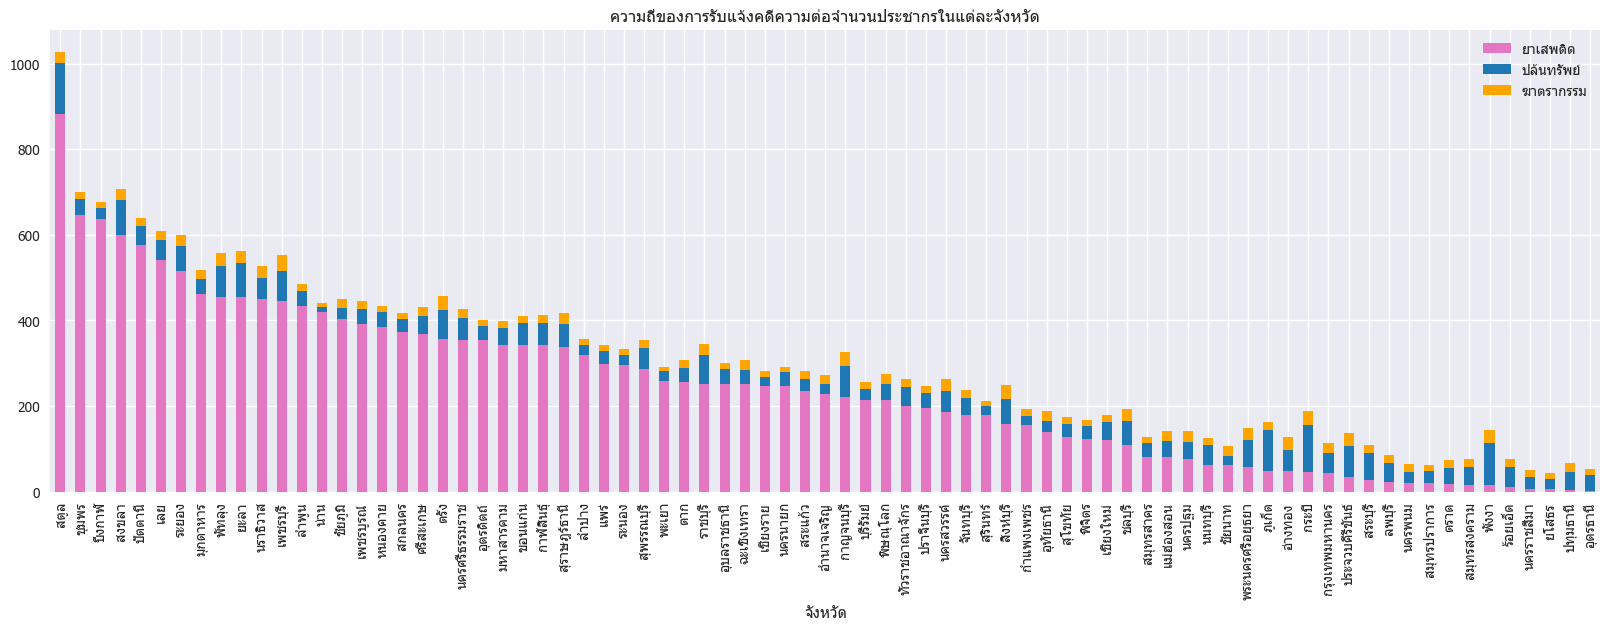

In [50]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.rcParams['font.family']='Tahoma'
plt.rcParams["figure.figsize"] = (20,6)
plt.rcParams['font.size']=13
dftop.plot.bar( x='จังหวัด', color={'orange','tab:blue','tab:pink'},stacked=True,title='ความถี่ของการรับแจ้งคดีความต่อจำนวนประชากรในแต่ละจังหวัด',alpha = 1.0)

### แผนภูมิรูปแท่งแสดงจำนวนคดีความที่ได้รับแจ้งในแต่ละจังหวัด เรียงตามจำนวนคดียาเสพติด

<AxesSubplot:title={'center':'ความถี่การรับแจ้งคดีในแต่ละจังหวัด'}, xlabel='จังหวัด'>

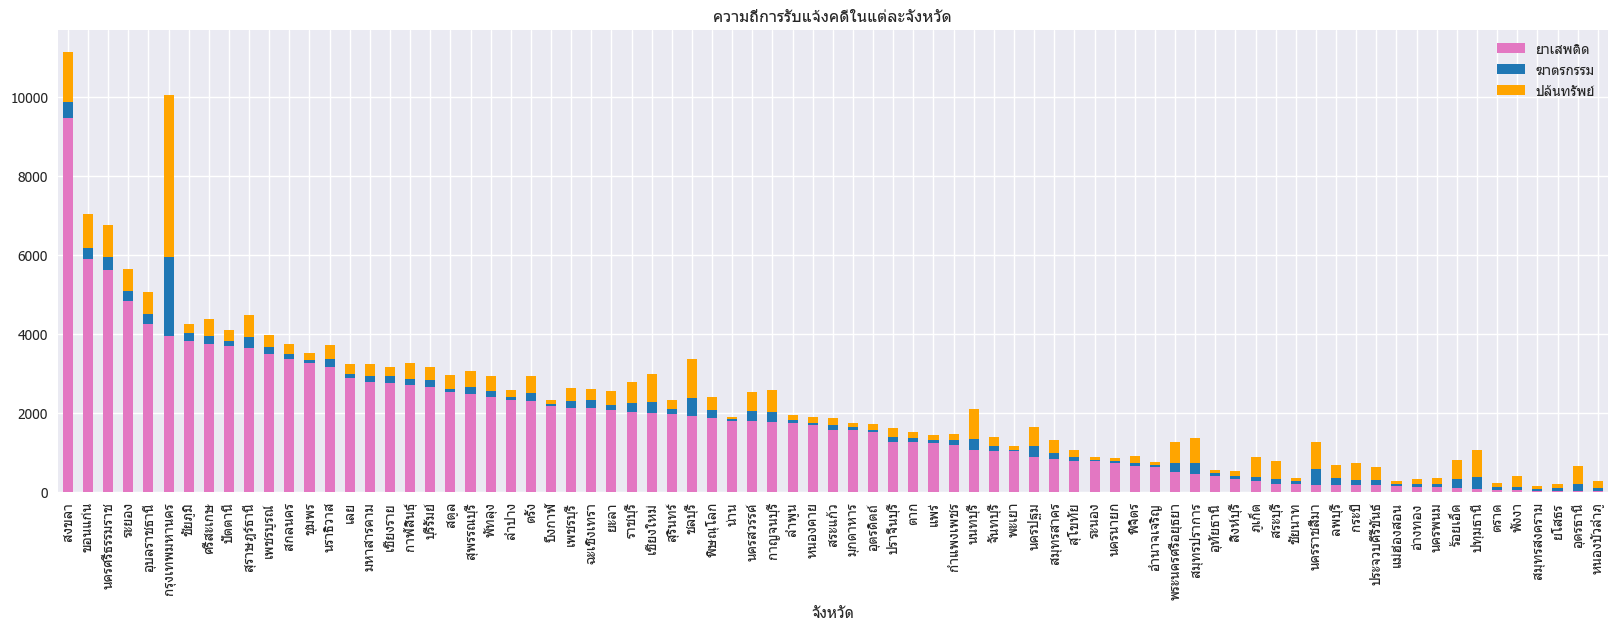

In [34]:
df_robb= df_rob[::][['จังหวัด1','2564']].reset_index(drop=True)
df_robb = df_robb.rename(columns={'จังหวัด1':'จังหวัด','2564':'ปล้นทรัพย์'})
df_crimee = df_crime[::][['จังหวัด','2564']].reset_index(drop=True)
df_crimee = df_crimee.rename(columns={'2564':'ฆาตรกรรม'})
df_drugg = df_drug[::][['จังหวัด','2564']].reset_index(drop=True)
df_drugg = df_drugg.rename(columns={'2564':'ยาเสพติด'})
dfdc = df_drugg.merge(df_crimee)
dfdcr = dfdc.merge(df_robb)
dfdcr= dfdcr.sort_values( 'ยาเสพติด', ascending=False )
dfdcr = dfdcr.iloc[1:,:]

dfdcr.plot.bar( x='จังหวัด', color={'orange','tab:blue','tab:pink'},stacked=True,title='ความถี่การรับแจ้งคดีในแต่ละจังหวัด',alpha = 1.0)

<AxesSubplot:title={'center':'ความถี่การรับแจ้งคดีในแต่ละจังหวัด'}, xlabel='จังหวัด'>

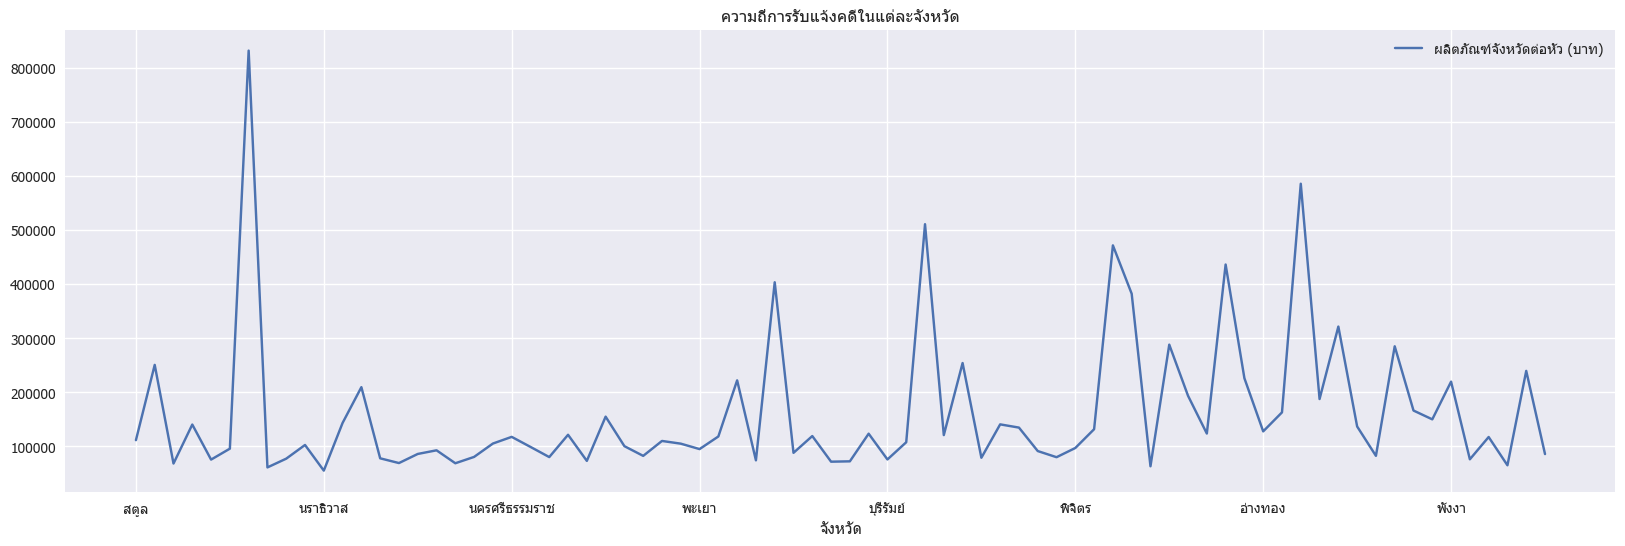

In [195]:
#gdp graph
plt.style.use('seaborn')
plt.rcParams['font.family']='Tahoma'
plt.rcParams["figure.figsize"] = (20,6)
plt.rcParams['font.size']=13
df_gdpp = dftop.merge(df_gpp)
df_gdpp = df_gdpp.loc[:,['จังหวัด','ผลิตภัณฑ์จังหวัดต่อหัว (บาท)']]
df_gdpp.plot.line( x='จังหวัด',title='ความถี่การรับแจ้งคดีในแต่ละจังหวัด',alpha = 1.0)

### Pearson coreration drug and crime and robberry

In [189]:
df_drug1 = df_drug.rename(columns={'จังหวัด':'จังหวัด1','2564':'Drug'})
df_drug2 = df_drug1.loc[:,['จังหวัด1','Drug']]
df_crime1 = df_crime.rename(columns={'จังหวัด':'จังหวัด1','2564':'Crime'})
df_crime2 = df_crime1.loc[:,['จังหวัด1','Crime']]
df_drugcrime = df_drug2.merge(df_crime2)#mrege1
df_rob1 = df_rob.rename(columns={'2564':'Robbery'})
df_rob2 = df_rob1.loc[:,['จังหวัด1','Robbery']]
df_drugcrimerob = df_drugcrime.merge(df_rob2)
df_drugcrimerob = df_drugcrimerob[:77]
df_drugcrimerob = df_drugcrimerob.rename(columns={'จังหวัด1':'จังหวัด'})
dfm1 = df_drugcrimerob.merge(df_gpp)
dfm2 = dfm1.merge(df_study)
dfm2 = dfm2.rename(columns={'ผลิตภัณฑ์จังหวัดต่อหัว (บาท)':'GPP','อัตราส่วนคนจบการศึกษา':'study_rate'})
dfm2

,จังหวัด,Drug,Crime,Robbery,GPP,study_rate
0,กรุงเทพมหานคร,3940.0,1993.0,4107.0,585689.20,34.867888
1,สมุทรปราการ,451.0,282.0,639.0,285173.11,23.225745
2,นนทบุรี,1058.0,273.0,770.0,193681.96,39.685152
3,ปทุมธานี,65.0,312.0,682.0,239753.29,24.900583
4,พระนครศรีอยุธยา,502.0,225.0,542.0,436363.15,23.859844
...,...,...,...,...,...,...
72,ตรัง,2294.0,219.0,430.0,105448.72,18.711267
73,พัทลุง,2400.0,155.0,383.0,77516.30,19.629933
74,ปัตตานี,3686.0,120.0,290.0,75778.77,12.409991
75,ยะลา,2060.0,129.0,363.0,102820.69,8.702393


<AxesSubplot:>

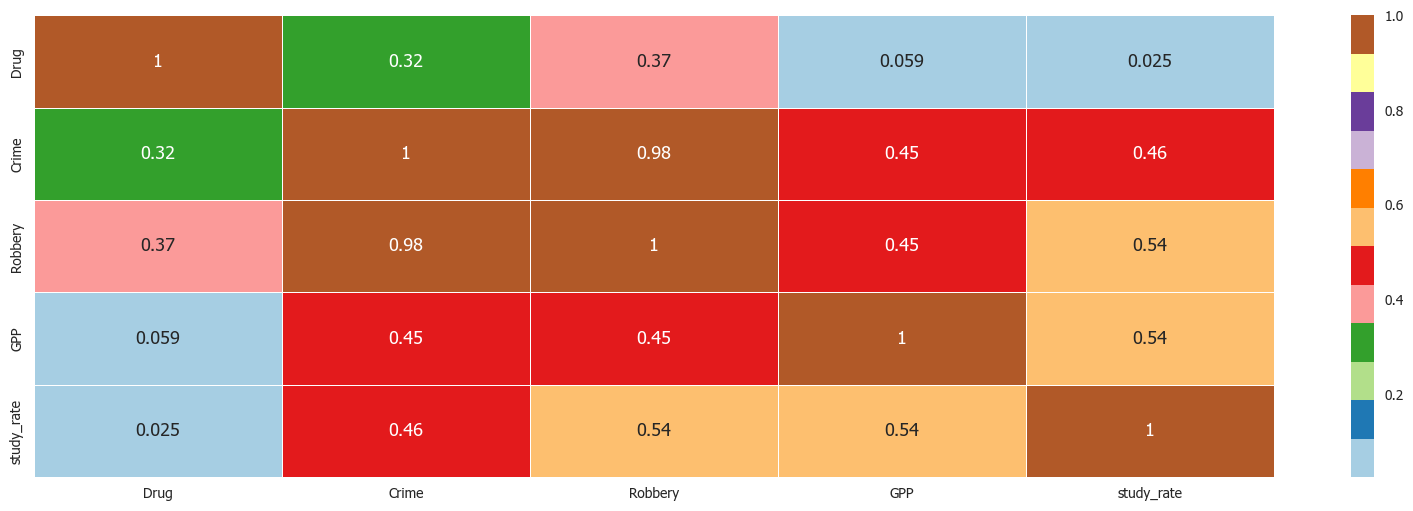

In [190]:
pearsoncorr = dfm2.corr(method='pearson')
pearsoncorr
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='Paired',
            annot=True,
            linewidth=0.5)

### line polt

In [26]:
#ทั้งประเทศ
dfa1 = df_drug[df_drug['จังหวัด'] == 'ทั่วราชอาณาจักร'].reset_index(drop=True)
dfa1.iat[0,0] = 'ยาเสพติด'
dfa1 = dfa1.T
dfb1 = df_crime[df_crime['จังหวัด'] == 'ทั่วราชอาณาจักร'].reset_index(drop=True)
dfb1.iat[0,0] = 'ฆาตรกรรม'
dfb1 = dfb1.iloc[:,5:]
dfb1 = dfb1.T
dfab1 = pd.concat([dfa1,dfb1],axis=1,ignore_index=False,sort=False)
dfc1 = df_rob[df_rob['จังหวัด1'] == 'ทั่วราชอาณาจักร'].reset_index(drop=True)
dfc1.iat[0,0] = 'ปล้นทรัพย์'
dfc1 = dfc1.rename(columns={'จังหวัด1':'จังหวัด'})
dfc1 = dfc1.iloc[:,5:]
dfc1 = dfc1.T
dfabc1 = pd.concat([dfab1,dfc1],axis=1,ignore_index=False,sort=False)
dfabc1.insert(0,'ปี',dfabc1.index)
dfabc1.columns = ['ปี','ยาเสพติด','ฆาตรกรรม','ปล้นทรัพย์']
dfabc1 = dfabc1.iloc[1:,:]
dfabc1

,ปี,ยาเสพติด,ฆาตรกรรม,ปล้นทรัพย์
2554,2554,189011.0,23993.0,47143.0
2555,2555,234770.0,25040.0,49715.0
2556,2556,238437.0,23944.0,50047.0
2557,2557,196736.0,23613.0,46064.0
2558,2558,145784.0,25087.0,47952.0
2559,2559,165242.0,20305.0,38924.0
2560,2560,177008.0,19830.0,41725.0
2561,2561,219709.0,17468.0,35629.0
2562,2562,183534.0,16573.0,31012.0
2563,2563,143875.0,14459.0,27564.0


In [27]:
#กทม
dfa = df_drug[df_drug['จังหวัด'] == 'กรุงเทพมหานคร'].reset_index(drop=True)
dfa.iat[0,0] = 'ยาเสพติด'
dfa = dfa.T
dfb = df_crime[df_crime['จังหวัด'] == 'กรุงเทพมหานคร'].reset_index(drop=True)
dfb.iat[0,0] = 'ฆาตรกรรม'
dfb = dfb.iloc[:,5:]
dfb = dfb.T
dfab = pd.concat([dfa,dfb],axis=1,ignore_index=False,sort=False)
dfc = df_rob[df_rob['จังหวัด1'] == 'กรุงเทพมหานคร'].reset_index(drop=True)
dfc.iat[0,0] = 'ปล้นทรัพย์'
dfc = dfc.rename(columns={'จังหวัด1':'จังหวัด'})
dfc = dfc.iloc[:,5:]
dfc = dfc.T
dfabc = pd.concat([dfab,dfc],axis=1,ignore_index=False,sort=False)
dfabc.insert(0,'ปี',dfabc.index)
dfabc= dfabc.iloc[1:,:]
dfabc.columns = ['ปี','ยาเสพติด','ฆาตรกรรม','ปล้นทรัพย์']
#dfabc

### แผนภูมิเส้นแสดงจำนวนคดีความในกรุงเทพมหานคร

<AxesSubplot:title={'center':'จำนวนคดีความในกรุงเทพมหานคร'}, xlabel='ปี'>

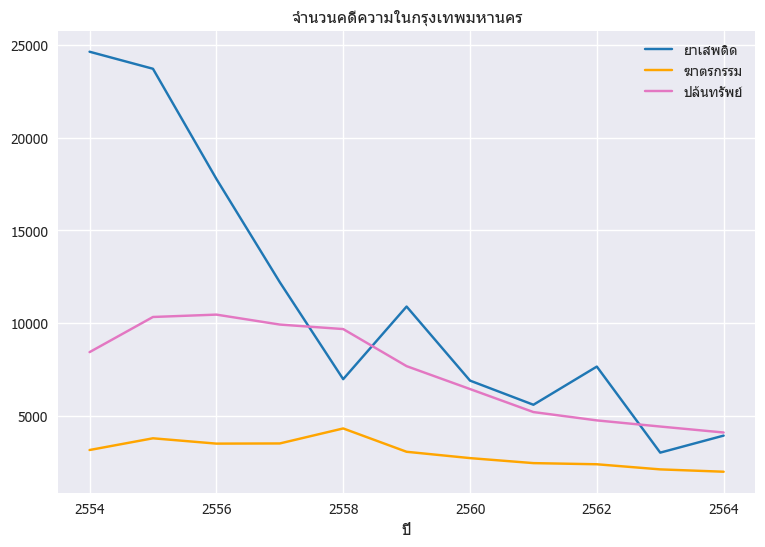

In [28]:
plt.style.use('seaborn')
plt.rcParams['font.family']='Tahoma'
plt.rcParams['font.size']=13
plt.rcParams["figure.figsize"] = (9,6)
dfabc.plot.line( x='ปี', color={'orange','tab:blue','tab:pink','red','green'},title='จำนวนคดีความในกรุงเทพมหานคร',alpha = 1.0)

### แผนภูมิเส้นแสดงจำนวนคดีความในประเทศไทย

<AxesSubplot:title={'center':'จำนวนคดีความในประเทศไทย'}, xlabel='ปี'>

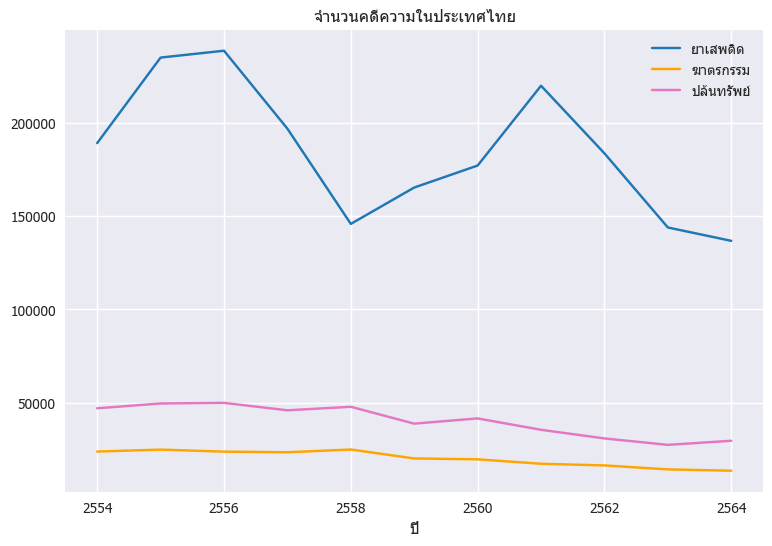

In [29]:
plt.style.use('seaborn')
plt.rcParams['font.family']='Tahoma'
plt.rcParams['font.size']=13
plt.rcParams["figure.figsize"] = (9,6)
dfabc1.plot.line( x='ปี', color={'orange','tab:blue','tab:pink','red','green'},title='จำนวนคดีความในประเทศไทย',alpha = 1.0)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
dfabc2 = dfabc1
dfabc2[['ยาเสพติด','ฆาตรกรรม','ปล้นทรัพย์']] = scaler.fit_transform(dfabc2[['ยาเสพติด','ฆาตรกรรม','ปล้นทรัพย์',]])

<AxesSubplot:title={'center':'จำนวนคดีความในประเทศไทยโดยการปรับสเกลด้วย StandardScaler'}, xlabel='ปี'>

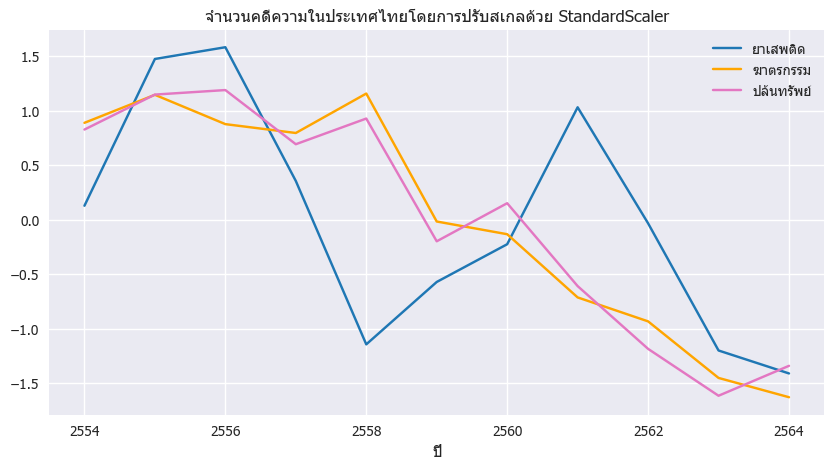

In [31]:
plt.style.use('seaborn')
plt.rcParams['font.family']='Tahoma'
plt.rcParams['font.size']=13
plt.rcParams["figure.figsize"] = (10,5)
dfabc2.plot.line( x='ปี', color={'orange','tab:blue','tab:pink','red','green'},title= 'จำนวนคดีความในประเทศไทยโดยการปรับสเกลด้วย StandardScaler',alpha = 1.0)